In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# queueing type = none, red, codel, pscodel
# filename format: queueingType-hiBandwidth-loBandwidth-#connections-packetLen-queueSize-interval.output
files = []

In [3]:
column_headers = ['ID','Start Time (sec)','End Time (sec)','Transfer (Kbytes)','Bandwidth (Kbits/sec)',
                  'Lost','Total','Pct Lost','Link Utilization (%)','Packet Delay (ms)']

In [4]:
def make_dataframe(filename): # make sure this includes the filepath
    file = open(filename, 'r')
    # This boolean tells us whether we've seen [ ID] - this will be the header column of our table
    start_analyzing = False
    data_table = []

    for line in file:

        if "[ ID]" in line:
            start_analyzing = True
            continue

        if not start_analyzing or "[SUM]" in line or "out-of-order" in line:
            continue

        #print(line)

        ID = int(line[3])

        line = line[6:]

        start_time = 0

        if line[1] == ".":
            start_time = int(line[0])
            line = line[5:]
        elif line[2] == ".":
            start_time = int(line[0:2])
            line = line[6:]
        else:
            print("Error in getting start_time")

        end_time = 0

        if line[1] == ".":
            end_time = int(line[0])
            line = line[10:]
        elif line[2] == ".":
            end_time = int(line[0:2])
            line = line[11:]
        else:
            print("Error in getting end_time")

        if end_time - start_time > 10:
            continue
            
        data = line.split()
        #print(data)

        transfer = float(data[0])
        #ignore data[1]
        bandwidth = float(data[2])
        #ignore data[3]
        #ignore data[4] - but, if jitter = 0, line is bad
        if float(data[4]) == 0:
            continue
        #ignore data[5]
        lost = int(data[6].split('/')[0])
        total = int(data[7])
        pct_lost = float(data[8][1:].split('%')[0])
        link_util = ((transfer * 8) / (end_time - start_time)) / bandwidth * 100
        packet_delay = float(data[9].split('/')[0])
        #ignore the rest

        data_row = [ID,start_time,end_time,transfer,bandwidth,lost,total,pct_lost,link_util,packet_delay]
        data_table.append(data_row)

        #print("data_row:",data_row)

    return pd.DataFrame(data_table, columns=column_headers)

# Note for Reviewers
The next cell is one sample result you can recreate by running the iPerf command lines in our Instructions Google Doc.

Note that these results will be similar but not necessarily the same because each run will give slightly different outputs.

We also experimented with different iPerf settings, but we are still working toward reducing our link utilization, and we would be welcome to any suggestions.

To recreate our results in the cell below, you can run the following two lines, replacing 'server_outputs/target.output' with your file path and file name.

In [5]:
# CHANGE LATER
#bandwidths = [50, 64]

In [6]:
# Parsing Group 9's Output
#df_group9_none_50 = make_dataframe('server_outputs/group9_none_50.output')
#df_group9_none_64 = make_dataframe('server_outputs/group9_none_64.output')
#df_group9_red_50 = make_dataframe('server_outputs/group9_red_50.output')
#df_group9_red_64 = make_dataframe('server_outputs/group9_red_64.output')
#df_group9_codel_50 = make_dataframe('server_outputs/group9_codel_50.output')
#df_group9_codel_64 = make_dataframe('server_outputs/group9_codel_64.output')



In [7]:
# Parsing Reviewer's Output
#df_reviewer_none_50 = make_dataframe('reviewer_none_50.output')
#df_reviewer_none_64 = make_dataframe('reviewer_none_64.output')
#df_reviewer_red_50 = make_dataframe('reviewer_red_50.output')
#df_reviewer_red_64 = make_dataframe('reviewer_red_64.output')
#df_reviewer_codel_50 = make_dataframe('reviewer_codel_50.output')
#df_reviewer_codel_64 = make_dataframe('reviewer_codel_64.output')



In [8]:
target_df = make_dataframe('server_outputs/target.output')
#target_df

In [9]:
df10 = make_dataframe('server_outputs/server10.output')
#df10

In [10]:
df10.sort_values(by=['ID','Start Time (sec)'],inplace=True)
#df10

In [11]:
df11 = make_dataframe('server_outputs/none-200-50-7-300.output')
#df11

In [12]:
group9_df = make_dataframe('server_outputs/none-200-50-6-800.output')
#group9_df

In [13]:
#print(group9_df['Packet Delay (ms)'])

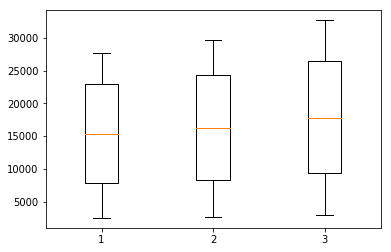

In [14]:
# How to create a box and whisker plot
# Wanna create this plot for (y-axis) link utilization and packet delay for each AQM
# x-axis = bottleneck bandwidths --> for each experiment, 
    # either fix ratio of high bw to low bw or fix high bw --> ask Erfan

data = [df10['Packet Delay (ms)'],
       df11['Packet Delay (ms)'],
       group9_df['Packet Delay (ms)']]
    
# plt.boxplot(np.array(df14['Packet Delay (ms)'], df13['Packet Delay (ms)']))

fig1 = plt.boxplot(data)


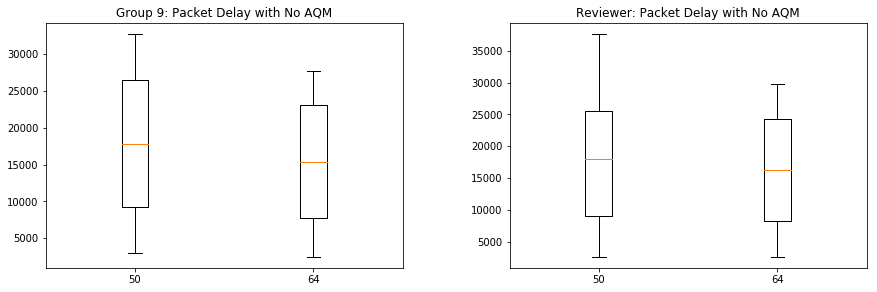

In [15]:
# AQM = None
# Variable = Packet Delay
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Packet Delay (ms)'],
              df10['Packet Delay (ms)']]

# really = [group9_df_None_50['Packet Delay (ms)'],
          #group9_df_None_64['Packet Delay (ms)'],
          #group9_df_None_100['Packet Delay (ms)'],
          #group9_df_None_180['Packet Delay (ms)']]

reviewer_data = [target_df['Packet Delay (ms)'],
                df11['Packet Delay (ms)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Packet Delay with No AQM')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Packet Delay with No AQM')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

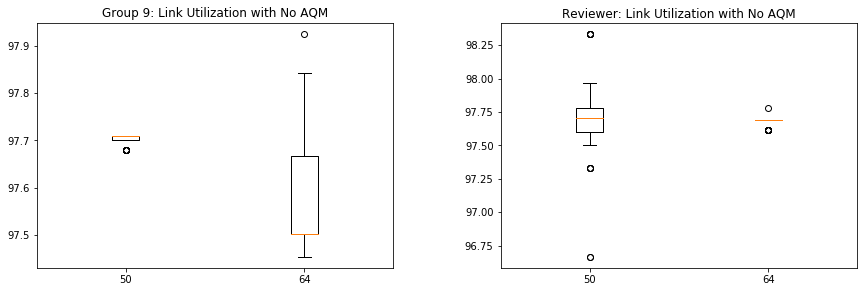

In [16]:
# AQM = None
# Variable = Link Utilization
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Link Utilization (%)'],
              df10['Link Utilization (%)']]

reviewer_data = [target_df['Link Utilization (%)'],
                df11['Link Utilization (%)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Link Utilization with No AQM')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Link Utilization with No AQM')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

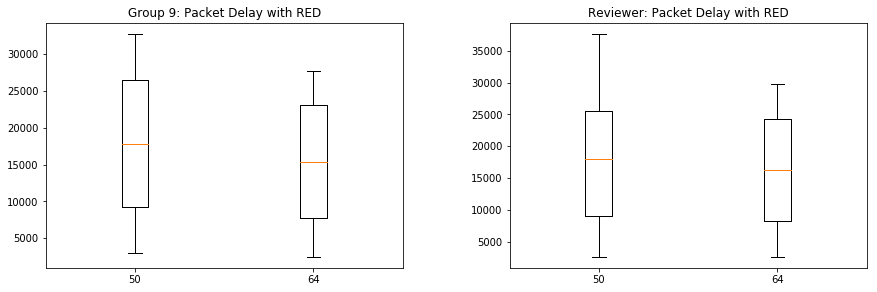

In [17]:
# AQM = RED
# Variable = Packet Delay
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Packet Delay (ms)'],
              df10['Packet Delay (ms)']]

reviewer_data = [target_df['Packet Delay (ms)'],
                df11['Packet Delay (ms)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Packet Delay with RED')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Packet Delay with RED')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

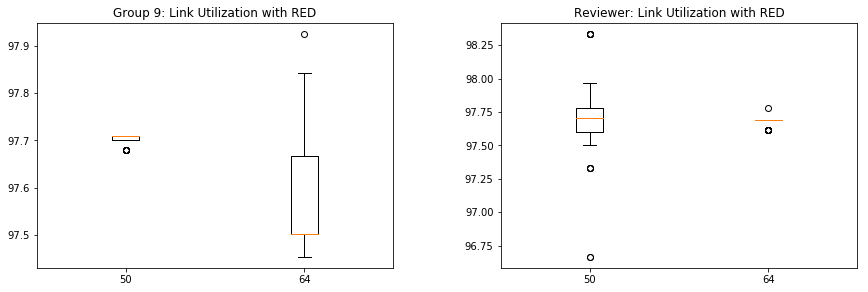

In [18]:
# AQM = RED
# Variable = Link Utilization
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Link Utilization (%)'],
              df10['Link Utilization (%)']]

reviewer_data = [target_df['Link Utilization (%)'],
                df11['Link Utilization (%)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Link Utilization with RED')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Link Utilization with RED')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

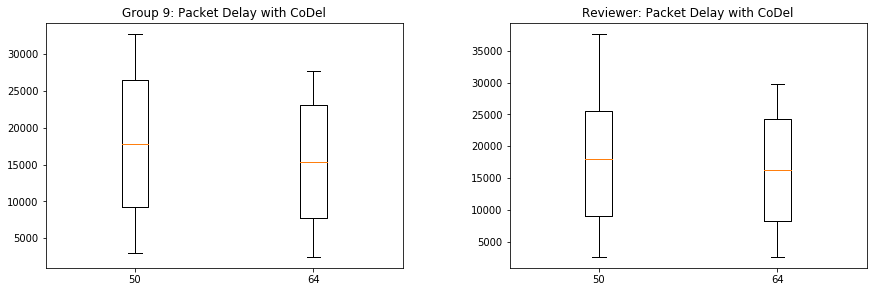

In [19]:
# AQM = CoDel
# Variable = Packet Delay
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Packet Delay (ms)'],
              df10['Packet Delay (ms)']]

reviewer_data = [target_df['Packet Delay (ms)'],
                df11['Packet Delay (ms)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Packet Delay with CoDel')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Packet Delay with CoDel')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

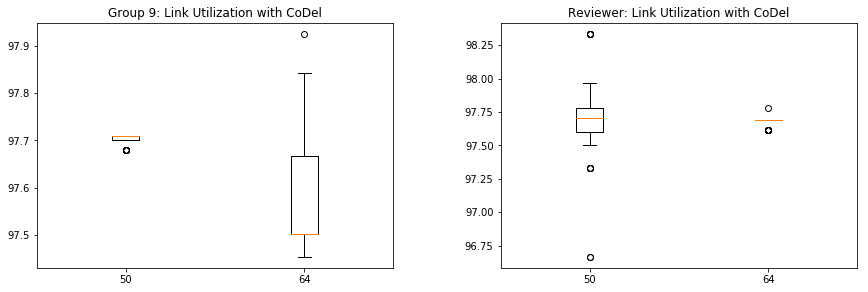

In [20]:
# AQM = CoDel
# Variable = Link Utilization
# Left plot = Group 9's Results
# Right plot = Reviewer's Results

# Notation: who_df_AQM_bw-low
# E.g.      group9_df_AQM_50

group9_data = [group9_df['Link Utilization (%)'],
              df10['Link Utilization (%)']]

reviewer_data = [target_df['Link Utilization (%)'],
                df11['Link Utilization (%)']]

fig, axs = plt.subplots(1,2)

axs[0].boxplot(group9_data)
axs[0].set_title('Group 9: Link Utilization with CoDel')
axs[0].set_xticklabels([50, 64])

axs[1].boxplot(reviewer_data)
axs[1].set_title('Reviewer: Link Utilization with CoDel')
axs[1].set_xticklabels([50, 64])

fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# Automated Result Comparisons

### AQM: None
### Variable: Packet Delay
### Left Plot: Group 9's Results
### Right Plot: Reviewer's Results

In [ ]:
#group9_data = [df_group9_none_50['Packet Delay (ms)'],
              #df_group9_none_64['Packet Delay (ms)']]

#reviewer_data = [df_reviewer_none_50['Packet Delay (ms)'],
                #df_reviewer_none_64['Packet Delay (ms)']]

#fig, axs = plt.subplots(1,2)

#axs[0].boxplot(group9_data)
#axs[0].set_title('Group 9: Packet Delay with No AQM')
#axs[0].set_xticklabels([50, 64])

#axs[1].boxplot(reviewer_data)
#axs[1].set_title('Reviewer: Packet Delay with No AQM')
#axs[1].set_xticklabels([50, 64])

#fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                    hspace=0.4, wspace=0.3)